In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multinomial
from sklearn.preprocessing import MinMaxScaler

# Training

## Load train data

In [2]:
primary_data = pd.read_csv('./data/train_data/train_task_3_4.csv')
print(primary_data.head())
len(primary_data)

   QuestionId  UserId  AnswerId  IsCorrect  CorrectAnswer  AnswerValue
0         898    2111    280203          1              2            2
1         767    3062     55638          1              3            3
2         165    1156    386475          1              2            2
3         490    1653    997498          1              4            4
4         298    3912    578636          1              3            3


1382727

## Load metadata

In [3]:
# load answer metedata
answer_metadata = pd.read_csv('data/metadata/answer_metadata_task_3_4.csv')
answer_metadata

,AnswerId,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
0,1451945,2019-10-30 14:34:00.000,NaN,4,32,52562.0
1,45325,2020-01-06 18:53:00.000,75.0,185,66,52562.0
2,687013,2020-01-18 10:52:00.000,NaN,235,64,52562.0
3,91254,2020-02-29 17:25:00.000,NaN,194,97,52562.0
4,1225855,2020-03-06 15:07:00.000,NaN,95,115,52562.0
...,...,...,...,...,...,...
1508912,880336,2019-12-05 18:56:00.000,75.0,27,84,52562.0
1508913,701366,2020-01-20 20:27:00.000,NaN,362,65,52562.0
1508914,646214,2019-12-17 19:33:00.000,NaN,170,84,52562.0
1508915,346788,2019-10-25 15:00:00.000,NaN,10,73,52562.0


In [4]:
# load student metedata
student_metadata = pd.read_csv('data/metadata/student_metadata_task_3_4.csv')
student_metadata

,UserId,Gender,DateOfBirth,PremiumPupil
0,3837,2,2007-10-01 00:00:00.000,0.0
1,207,0,NaN,NaN
2,3581,2,2008-03-01 00:00:00.000,0.0
3,6028,2,2008-01-01 00:00:00.000,0.0
4,1451,0,NaN,NaN
...,...,...,...,...
6143,5831,0,NaN,NaN
6144,3165,2,2008-01-01 00:00:00.000,0.0
6145,273,2,NaN,NaN
6146,2169,2,2008-03-01 00:00:00.000,0.0


## Join table

In [5]:
# join train data table and answer_metadata table
join_table = pd.merge(primary_data, answer_metadata, left_on='AnswerId', right_on='AnswerId')
join_table

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId
0,898,2111,280203,1,2,2,2019-12-08 17:47:00.000,NaN,95,86,52562.0
1,767,3062,55638,1,3,3,2019-10-27 20:54:00.000,25.0,115,39,52562.0
2,165,1156,386475,1,2,2,2019-10-06 20:16:00.000,NaN,101,39,52562.0
3,490,1653,997498,1,4,4,2020-02-27 17:40:00.000,NaN,46,115,52562.0
4,298,3912,578636,1,3,3,2019-12-27 16:07:00.000,NaN,314,78,52562.0
...,...,...,...,...,...,...,...,...,...,...,...
1382722,80,2608,57945,1,2,2,2019-11-28 15:22:00.000,NaN,270,65,52562.0
1382723,707,2549,584230,0,2,1,2020-01-06 16:26:00.000,NaN,269,109,52562.0
1382724,840,5901,1138956,1,1,1,2020-01-07 07:14:00.000,NaN,270,66,52562.0
1382725,794,3854,1151183,0,1,3,2019-12-15 16:32:00.000,NaN,339,9,52562.0


In [6]:
join_table = pd.merge(join_table, student_metadata, left_on='UserId', right_on='UserId')
join_table

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Gender,DateOfBirth,PremiumPupil
0,898,2111,280203,1,2,2,2019-12-08 17:47:00.000,NaN,95,86,52562.0,2,2007-09-01 00:00:00.000,0.0
1,359,2111,1177798,0,3,4,2020-03-12 15:30:00.000,NaN,95,115,52562.0,2,2007-09-01 00:00:00.000,0.0
2,920,2111,154427,1,1,1,2020-01-05 19:21:00.000,NaN,95,59,52562.0,2,2007-09-01 00:00:00.000,0.0
3,908,2111,362958,1,4,4,2019-11-25 20:19:00.000,NaN,95,109,52562.0,2,2007-09-01 00:00:00.000,0.0
4,795,2111,566849,1,2,2,2019-11-25 20:21:00.000,NaN,95,109,52562.0,2,2007-09-01 00:00:00.000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382722,439,1073,712140,0,2,1,2019-12-01 20:44:00.000,100.0,271,25,52562.0,0,NaN,NaN
1382723,509,1073,300473,1,2,2,2019-11-05 18:38:00.000,NaN,271,17,52562.0,0,NaN,NaN
1382724,808,1073,762055,1,1,1,2020-01-03 14:42:00.000,NaN,271,84,52562.0,0,NaN,NaN
1382725,56,1073,1430569,1,3,3,2020-02-19 10:34:00.000,NaN,271,88,52562.0,0,NaN,NaN


## Fill missing values with the mean.

In [7]:
# preprocessing answer metadata
# fill mean in NA of Confidence
join_table['Confidence'] = join_table['Confidence'].fillna(join_table['Confidence'].mean())

In [8]:
# preprocessing PremiumPupil
join_table['PremiumPupil'] = join_table['PremiumPupil'].fillna(join_table['PremiumPupil'].mean())
join_table

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,Gender,DateOfBirth,PremiumPupil
0,898,2111,280203,1,2,2,2019-12-08 17:47:00.000,73.947617,95,86,52562.0,2,2007-09-01 00:00:00.000,0.00000
1,359,2111,1177798,0,3,4,2020-03-12 15:30:00.000,73.947617,95,115,52562.0,2,2007-09-01 00:00:00.000,0.00000
2,920,2111,154427,1,1,1,2020-01-05 19:21:00.000,73.947617,95,59,52562.0,2,2007-09-01 00:00:00.000,0.00000
3,908,2111,362958,1,4,4,2019-11-25 20:19:00.000,73.947617,95,109,52562.0,2,2007-09-01 00:00:00.000,0.00000
4,795,2111,566849,1,2,2,2019-11-25 20:21:00.000,73.947617,95,109,52562.0,2,2007-09-01 00:00:00.000,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382722,439,1073,712140,0,2,1,2019-12-01 20:44:00.000,100.000000,271,25,52562.0,0,NaN,0.27884
1382723,509,1073,300473,1,2,2,2019-11-05 18:38:00.000,73.947617,271,17,52562.0,0,NaN,0.27884
1382724,808,1073,762055,1,1,1,2020-01-03 14:42:00.000,73.947617,271,84,52562.0,0,NaN,0.27884
1382725,56,1073,1430569,1,3,3,2020-02-19 10:34:00.000,73.947617,271,88,52562.0,0,NaN,0.27884


In [9]:
join_table['Gender0'] = 0
join_table['Gender1'] = 0
join_table['Gender2'] = 0

join_table.loc[join_table['Gender'] == 0, 'Gender0'] = 1
join_table.loc[join_table['Gender'] == 1, 'Gender1'] = 1
join_table.loc[join_table['Gender'] == 2, 'Gender2'] = 1
join_table = join_table.drop('Gender', axis=1)

join_table

,QuestionId,UserId,AnswerId,IsCorrect,CorrectAnswer,AnswerValue,DateAnswered,Confidence,GroupId,QuizId,SchemeOfWorkId,DateOfBirth,PremiumPupil,Gender0,Gender1,Gender2
0,898,2111,280203,1,2,2,2019-12-08 17:47:00.000,73.947617,95,86,52562.0,2007-09-01 00:00:00.000,0.00000,0,0,1
1,359,2111,1177798,0,3,4,2020-03-12 15:30:00.000,73.947617,95,115,52562.0,2007-09-01 00:00:00.000,0.00000,0,0,1
2,920,2111,154427,1,1,1,2020-01-05 19:21:00.000,73.947617,95,59,52562.0,2007-09-01 00:00:00.000,0.00000,0,0,1
3,908,2111,362958,1,4,4,2019-11-25 20:19:00.000,73.947617,95,109,52562.0,2007-09-01 00:00:00.000,0.00000,0,0,1
4,795,2111,566849,1,2,2,2019-11-25 20:21:00.000,73.947617,95,109,52562.0,2007-09-01 00:00:00.000,0.00000,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1382722,439,1073,712140,0,2,1,2019-12-01 20:44:00.000,100.000000,271,25,52562.0,NaN,0.27884,1,0,0
1382723,509,1073,300473,1,2,2,2019-11-05 18:38:00.000,73.947617,271,17,52562.0,NaN,0.27884,1,0,0
1382724,808,1073,762055,1,1,1,2020-01-03 14:42:00.000,73.947617,271,84,52562.0,NaN,0.27884,1,0,0
1382725,56,1073,1430569,1,3,3,2020-02-19 10:34:00.000,73.947617,271,88,52562.0,NaN,0.27884,1,0,0


In [10]:
df = pd.DataFrame()
df

""


## Calculate each parameter groupby QuestionId

In [11]:
# calculate confidence mean in each Question
df['confidence'] = join_table.groupby('QuestionId')['Confidence'].mean()
print(df['confidence'])

QuestionId
0      71.128780
1      73.947617
2      71.968351
3      76.873508
4      71.402170
         ...    
943    77.239537
944    73.211009
945    73.498032
946    73.658342
947    74.164819
Name: confidence, Length: 948, dtype: float64


In [12]:
# calculate entropy in each Question
df['entropy'] = join_table.groupby('QuestionId')['AnswerValue'].apply(lambda x : multinomial.entropy(1, x.value_counts(normalize=True)))
df['entropy']

QuestionId
0       1.194456119275689
1      0.8760057656431736
2      1.3316632075619683
3      0.6954225533991737
4      1.3243211426168569
              ...        
943    0.9585435938032012
944    1.3124040297960131
945    1.2609343801953017
946    1.2367325970309815
947      1.08261445702246
Name: entropy, Length: 948, dtype: object

In [13]:
# calculate correct rate in each Question
df['correct_rate'] = join_table.groupby('QuestionId')['IsCorrect'].mean()
df['correct_rate']

QuestionId
0      0.443457
1      0.571429
2      0.385214
3      0.808757
4      0.401408
         ...   
943    0.566528
944    0.142857
945    0.422336
946    0.459459
947    0.617124
Name: correct_rate, Length: 948, dtype: float64

In [14]:
# calculate Gender
df['gender0'] = join_table.groupby('QuestionId')['Gender0'].mean()
df['gender1'] = join_table.groupby('QuestionId')['Gender1'].mean()
df['gender2'] = join_table.groupby('QuestionId')['Gender2'].mean()
print(df['gender0'])
print(df['gender1'])
print(df['gender2'])

QuestionId
0      0.352418
1      0.000000
2      0.319066
3      0.310629
4      0.379108
         ...   
943    0.345270
944    0.322751
945    0.319213
946    0.288288
947    0.305331
Name: gender0, Length: 948, dtype: float64
QuestionId
0      0.329303
1      0.000000
2      0.347168
3      0.352545
4      0.315728
         ...   
943    0.337731
944    0.269841
945    0.348310
946    0.243243
947    0.287561
Name: gender1, Length: 948, dtype: float64
QuestionId
0      0.315789
1      1.000000
2      0.333766
3      0.336826
4      0.305164
         ...   
943    0.314361
944    0.407407
945    0.332478
946    0.468468
947    0.407108
Name: gender2, Length: 948, dtype: float64


In [15]:
# calculate premium pupil
df['premium_pupil'] = join_table.groupby('QuestionId')['PremiumPupil'].mean()
df['premium_pupil']

QuestionId
0      0.281644
1      0.302195
2      0.288251
3      0.280661
4      0.290055
         ...   
943    0.276147
944    0.286168
945    0.288841
946    0.268103
947    0.258851
Name: premium_pupil, Length: 948, dtype: float64

In [16]:
df

,confidence,entropy,correct_rate,gender0,gender1,gender2,premium_pupil
QuestionId,,,,,,,
0,71.128780,1.194456119275689,0.443457,0.352418,0.329303,0.315789,0.281644
1,73.947617,0.8760057656431736,0.571429,0.000000,0.000000,1.000000,0.302195
2,71.968351,1.3316632075619683,0.385214,0.319066,0.347168,0.333766,0.288251
3,76.873508,0.6954225533991737,0.808757,0.310629,0.352545,0.336826,0.280661
4,71.402170,1.3243211426168569,0.401408,0.379108,0.315728,0.305164,0.290055
...,...,...,...,...,...,...,...
943,77.239537,0.9585435938032012,0.566528,0.345270,0.337731,0.314361,0.276147
944,73.211009,1.3124040297960131,0.142857,0.322751,0.269841,0.407407,0.286168
945,73.498032,1.2609343801953017,0.422336,0.319213,0.348310,0.332478,0.288841


## Normalization

In [17]:
scaler = MinMaxScaler()
norm_df = scaler.fit_transform(df)
norm_df = pd.DataFrame(norm_df, columns=df.columns)
norm_df

,confidence,entropy,correct_rate,gender0,gender1,gender2,premium_pupil
0,0.505210,0.861618,0.350699,0.531831,0.799868,0.152882,0.846988
1,0.638090,0.631905,0.500000,0.000000,0.000000,1.000000,0.949313
2,0.544787,0.960592,0.282750,0.481500,0.843262,0.175138,0.879886
3,0.776016,0.501641,0.776884,0.468767,0.856322,0.178928,0.842093
4,0.518098,0.955296,0.301643,0.572108,0.766894,0.139727,0.888868
...,...,...,...,...,...,...,...
943,0.793271,0.691443,0.494283,0.521043,0.820339,0.151114,0.819617
944,0.603366,0.946699,0.000000,0.487061,0.655437,0.266314,0.869515
945,0.616896,0.909572,0.326059,0.481721,0.846035,0.173544,0.882826
946,0.624453,0.892114,0.369369,0.435053,0.590831,0.341913,0.779566


## Load validation dataset

## Preprocessing validation dataset

In [18]:
# load evaluators' score on "validation" set
eval_validation = pd.read_csv('data/test_data/quality_response_remapped_public.csv')
print(len(eval_validation))
eval_validation.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,0,0,909,318,2,2,2,1.0,2
1,16,16,285,609,2,2,2,2.0,2
2,48,48,132,271,1,2,2,2.0,1
3,38,38,704,127,2,2,1,2.0,2
4,33,33,16,586,1,1,2,2.0,2


<Axes: >

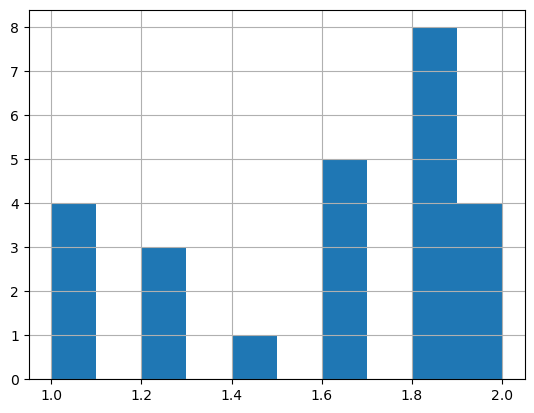

In [19]:
# take the average of 5 evaulators` scores
eval_validation['score'] = eval_validation.filter(regex='^T', axis = 1).mean(axis=1)
eval_validation['score'].hist()

In [20]:
def calc_preference(scores):
    preference = np.ones(len(scores), dtype=int)

    idx_two = scores > 1.5
    preference[idx_two] = 2

    return list(preference)

<Axes: >

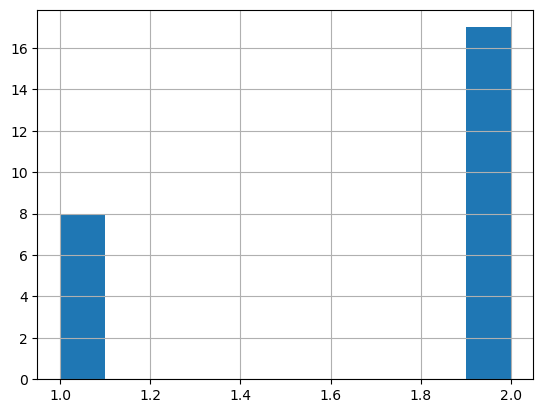

In [21]:
eval_validation['preference'] = calc_preference(eval_validation['score'])
# eval_dev[]
# eval_dev['score']
eval_validation['preference'].hist()

In [22]:
def evaluate(truth, submission):
    # extract ranking
    left = list(truth.left)
    right = list(truth.right)
#     if len(left) != len(right):
#     message = 'left and right lengths are not the same'
#     sys.exit(message)

    submission_left = []
    submission_right = []
    submission_preference = []
    for idx in range(len(left)):
        submission_left.append(left[idx])
        submission_right.append(right[idx])
        ranking_left = submission[submission.QuestionId==left[idx]].ranking.values[0]
        ranking_right = submission[submission.QuestionId==right[idx]].ranking.values[0]
        preference = 1 if ranking_left < ranking_right else 2
        submission_preference.append(preference)
    return(submission_preference)

## Subset Selection

In [23]:
import itertools
def best_subset_selection(X, k):
    global eval_validation
    # load template
    template = pd.read_csv('submission/template.csv')
    best_model = None
    best_subset = None
    best_error_rate = float('inf')
    for subset in itertools.combinations(X.columns.tolist(), k):
        # Ranking
        rank = template.copy()
        sum = 0
        for it in subset:
            sum += X[it]
            
        rank['ranking'] = sum.rank(method='first', ascending=False).astype('int16')
        eval_validation['prediction'] = evaluate(eval_validation, rank)
        
        error_rate = len(eval_validation[eval_validation['preference']!=eval_validation['prediction']])/len(eval_validation)

        if error_rate < best_error_rate:
            best_error_rate = error_rate
            best_subset = subset
            best_rank = rank
                
    return best_subset, best_error_rate, best_rank

In [24]:
best_subset = None
best_error_rate = float('inf')
best_rank = None
for i in range(1, 8, 1):
    k_best_subset, k_best_error_rate, k_best_rank = best_subset_selection(norm_df, i)
    print(f'if k={i}, best error rate: {k_best_error_rate}, best subset: {k_best_subset}')
    
    if best_error_rate > k_best_error_rate:
        best_subset = k_best_subset
        best_error_rate = k_best_error_rate
        best_rank = k_best_rank

print('\n')
print(f'total best subset: {best_subset}')
print(f'total best error rate: {best_error_rate}')
print(f'total best rank: \n{best_rank}')

if k=1, best error rate: 0.16, best subset: ('entropy',)
if k=2, best error rate: 0.16, best subset: ('entropy', 'premium_pupil')
if k=3, best error rate: 0.2, best subset: ('entropy', 'gender0', 'gender2')
if k=4, best error rate: 0.16, best subset: ('entropy', 'gender0', 'gender1', 'gender2')
if k=5, best error rate: 0.24, best subset: ('confidence', 'entropy', 'gender0', 'gender1', 'gender2')
if k=6, best error rate: 0.32, best subset: ('confidence', 'entropy', 'gender0', 'gender1', 'gender2', 'premium_pupil')
if k=7, best error rate: 0.6, best subset: ('confidence', 'entropy', 'correct_rate', 'gender0', 'gender1', 'gender2', 'premium_pupil')


total best subset: ('entropy',)
total best error rate: 0.16
total best rank: 
     QuestionId  ranking
0             0      484
1             1      844
2             2      124
3             3      908
4             4      150
..          ...      ...
943         943      780
944         944      188
945         945      331
946         946 

## Make ranking file for evaluation and submission

In [25]:
best_rank.to_csv('submission/20182610.csv', index=False)
best_rank

,QuestionId,ranking
0,0,484
1,1,844
2,2,124
3,3,908
4,4,150
...,...,...
943,943,780
944,944,188
945,945,331
946,946,397


# Test

## Load test dataset

In [26]:
eval_test = pd.read_csv('data/test_data/quality_response_remapped_private.csv')
print(len(eval_test))
eval_test.head()

25


,Unnamed: 0.1,Unnamed: 0,left,right,T1_ALR,T2_CL,T3_GF,T4_MQ,T5_NS
0,15,15,145,762,2,2,2,2.0,2
1,31,31,307,208,1,1,1,2.0,1
2,25,25,278,195,1,1,1,1.0,1
3,3,3,13,153,2,2,2,2.0,2
4,40,40,23,100,2,1,1,1.0,1


## Preprocessing test dataset

<Axes: >

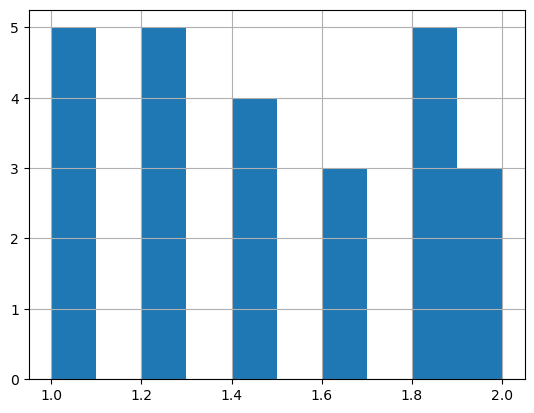

In [27]:
# take the average of scores by 5 evaulators
eval_test['score'] = eval_test.filter(regex='^T', axis = 1).mean(axis=1)
eval_test['score'].hist()

<Axes: >

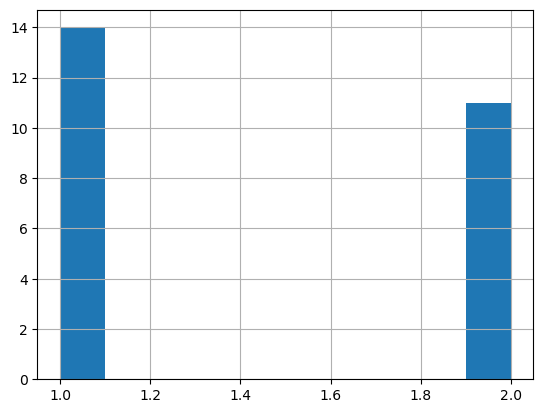

In [28]:
eval_test['preference'] = calc_preference(eval_test['score'])
eval_test['preference'].hist()

## Evaluate using test dataset

In [29]:
eval_test['prediction'] = evaluate(eval_test, best_rank)
print(list(eval_test['preference']))
print(list(eval_test['prediction']))
print(len(eval_test[eval_test['preference']!=eval_test['prediction']])/len(eval_test))

[2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2]
[2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 1, 2, 2]
0.36
